In [12]:
from tensorflow.keras.datasets import mnist

AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

In [49]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [50]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


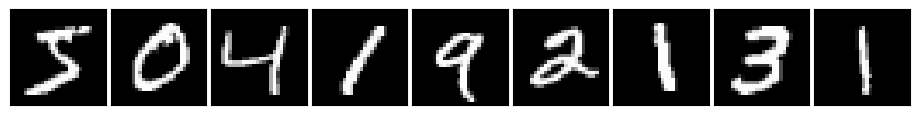

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

In [52]:
# データの整形
from tensorflow.keras.utils import to_categorical

#x_train = x_train.reshape(-1, 784) / 255
#x_test = x_test.reshape(-1, 784) /255
x_train = x_train.reshape(-1, 28,28,1) / 255
x_test = x_test.reshape(-1, 28,28,1) /255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_initializer='he_normal'))  # 最初の畳み込み層
model.add(MaxPooling2D((2, 2),strides=(1, 1), padding="same"))  # 最初のプーリング層

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))  # 2番目の畳み込み層
model.add(MaxPooling2D((2, 2),strides=(1, 1), padding="same"))  # 2番目のプーリング層

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'))  # 3番目の畳み込み層

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal'))  # 4番目の畳み込み層
model.add(MaxPooling2D((2, 2),strides=(1, 1), padding="same"))  # 3番目のプーリング層

model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal'))  # 5番目の畳み込み層
model.add(MaxPooling2D((2, 2),strides=(1, 1), padding="same"))  # 4番目のプーリング層

model.add(Flatten())



model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.8))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

In [83]:
# 学習
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=10, verbose=1)

model.fit(x_train, y_train, batch_size=1000, verbose=1, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.2439 - loss: 6.3274 - val_accuracy: 0.9431 - val_loss: 0.3521
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.7156 - loss: 0.7824 - val_accuracy: 0.9682 - val_loss: 0.1300
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.8322 - loss: 0.4668 - val_accuracy: 0.9806 - val_loss: 0.0713
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.8806 - loss: 0.3292 - val_accuracy: 0.9880 - val_loss: 0.0491
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.9103 - loss: 0.2502 - val_accuracy: 0.9878 - val_loss: 0.0451
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.9303 - loss: 0.1974 - val_accuracy: 0.9876 - val_loss: 0.0537
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.9424 - loss: 0.1668 - val_accuracy: 0.9899 - val_loss: 0.0466
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.9478 - loss: 0.1539 - val_accuracy: 0.9901 - v

In [84]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9897 - loss: 0.0517
Test loss: 0.03719719499349594
Test accuracy: 0.9923999905586243


In [77]:
import numpy as np
import keras

x = np.array([[1., 2., 3.],
               [4., 5., 6.],
             [7., 8., 9.]])
x = np.reshape(x, [1, 3, 3, 1])
max_pool_2d = keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding="same")
max_pool_2d(x)

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[5.],
         [6.],
         [6.]],

        [[8.],
         [9.],
         [9.]],

        [[8.],
         [9.],
         [9.]]]], dtype=float32)>

In [ ]:
"""Activation
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_initializer=he_normal()))  # 最初の畳み込み層
model.add(MaxPooling2D((2, 2)))  # 最初のプーリング層

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=he_normal()))  # 2番目の畳み込み層
model.add(MaxPooling2D((2, 2)))  # 2番目のプーリング層

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=he_normal()))  # 3番目の畳み込み層

model.add(Flatten())


"""

In [1]:
# データのロード
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
# データセットの大きさ確認
print(x_train.shape) # 訓練データのサイズ
print(x_test.shape) # テストデータのサイズ

(60000, 28, 28)
(10000, 28, 28)


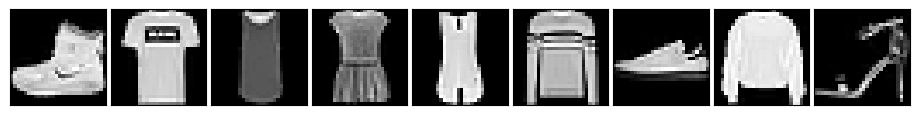

In [3]:
# データセットの表示
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

### 4.2 実装

In [4]:
# データの整形
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 784) / 255
x_test = x_test.reshape(-1, 784) /255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# モデル構築
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()

model.add(Dense(512, input_shape=(784,), activation='relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 比較用にsection2と類似のモデルを準備
model0 = Sequential()

model0.add(Dense(units=256, input_shape=(784,)))
model0.add(Activation('relu'))
model0.add(Dense(units=100))
model0.add(Activation('relu'))
model0.add(Dense(units=10))
model0.add(Activation('softmax'))

model0.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [8]:
# 学習
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=10, verbose=1)

model.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])
model0.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
60/60 - 2s - 32ms/step - accuracy: 0.6797 - loss: 0.9144 - val_accuracy: 0.8228 - val_loss: 0.5147
Epoch 2/10
60/60 - 1s - 10ms/step - accuracy: 0.8353 - loss: 0.4757 - val_accuracy: 0.8478 - val_loss: 0.4254
Epoch 3/10
60/60 - 1s - 9ms/step - accuracy: 0.8562 - loss: 0.4011 - val_accuracy: 0.8597 - val_loss: 0.3953
Epoch 4/10
60/60 - 1s - 9ms/step - accuracy: 0.8722 - loss: 0.3575 - val_accuracy: 0.8661 - val_loss: 0.3721
Epoch 5/10
60/60 - 1s - 8ms/step - accuracy: 0.8797 - loss: 0.3324 - val_accuracy: 0.8705 - val_loss: 0.3574
Epoch 6/10
60/60 - 0s - 8ms/step - accuracy: 0.8865 - loss: 0.3125 - val_accuracy: 0.8740 - val_loss: 0.3445
Epoch 7/10
60/60 - 0s - 8ms/step - accuracy: 0.8937 - loss: 0.2915 - val_accuracy: 0.8794 - val_loss: 0.3323
Epoch 8/10
60/60 - 0s - 8ms/step - accuracy: 0.8948 - loss: 0.2844 - val_accuracy: 0.8792 - val_loss: 0.3417
Epoch 9/10
60/60 - 1s - 8ms/step - accuracy: 0.8994 - loss: 0.2731 - val_accuracy: 0.8864 - val_loss: 0.3234
Epoch 10/10
60/60

In [9]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score0 = model0.evaluate(x_test, y_test, verbose=0)
print('Test loss by model0:', score0[0])
print('Test accuracy by model0:', score0[1])

Test loss: 0.3434632420539856
Test accuracy: 0.8831999897956848
Test loss by model0: 0.6638931035995483
Test accuracy by model0: 0.7809000015258789
